In [4]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
df = pd.read_csv(r"bhp.csv")

In [ ]:
# sns.histplot(df)

Text(0, 0.5, 'Count')

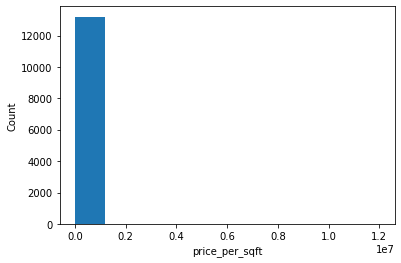

In [5]:
plt.hist(df.price_per_sqft)
plt.xlabel('price_per_sqft')
plt.ylabel('Count')

In [ ]:
# import numpy as np
# plt.plot(np.arange(df.shape[0]),df)
# plt.xlabel('price_per_sqft')
# plt.ylabel('Count')

In [6]:
q = df.price_per_sqft.quantile([0.001, 0.999])

In [7]:
df_outlier_1 = df[(df.price_per_sqft > list(q)[0]) & (df.price_per_sqft < list(q)[1])]
df_outlier_1

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [8]:
# df_outlier_no.shape
df_outlier_1_describe = df_outlier_1.price_per_sqft.describe()
df_outlier_1_mean = df_outlier_1_describe['mean']
df_outlier_1_std = df_outlier_1_describe['std']
df_outlier_1_mean,df_outlier_1_std

(6663.6537351958705, 4141.020700174613)

In [9]:
df_outlier_2 = df_outlier_1[(df_outlier_1.price_per_sqft > df_outlier_1_mean-4*df_outlier_1_std) &
                  (df_outlier_1.price_per_sqft < df_outlier_1_mean+4*df_outlier_1_std)]
df_outlier_2.shape

(13047, 7)

Text(0, 0.5, 'Count')

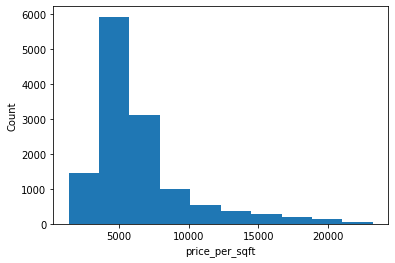

In [10]:
# sns.histplot(df_outlier_2.price_per_sqft,kde=1)
plt.hist(df_outlier_2.price_per_sqft)
plt.xlabel('price_per_sqft')
plt.ylabel('Count')

In [11]:
df_outlier_1['z_score'] = (df_outlier_1.price_per_sqft-df_outlier_1_mean)/df_outlier_1_std
df_outlier_1

C:\Users\sinha\AppData\Local\Temp\ipykernel_17552\4080667691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outlier_1['z_score'] = (df_outlier_1.price_per_sqft-df_outlier_1_mean)/df_outlier_1_std


,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_score
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,0.006121
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,1.073973
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.339446
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.903967


In [12]:
df_outlier_3 = df_outlier_1[(df_outlier_1['z_score'] > -4) & (df_outlier_1['z_score'] < 4)]
df_outlier_3.shape

(13047, 8)